<a href="https://colab.research.google.com/github/edgaracabral/Kaggle_BankMarketing/blob/main/03_Selecao_das_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Lendo dados pós processo de data prep

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Redirecione para o folder on pod_academy_functions.py is localizado
%cd /content/drive/MyDrive/PoD Academy/modelos/Hackaton_DS_2023/PoD Framework
import pod_academy_functions as pod

/content/drive/MyDrive/PoD Academy/modelos/Hackaton_DS_2023/PoD Framework


In [10]:
# Vá para o folder de dataprep
%cd /content/drive/MyDrive/Kaggle/Bank\ Marketing/02\ data\ prep

abt_00 = pd.read_csv('abt_train.csv')
abt_00.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_00.shape

/content/drive/MyDrive/Kaggle/Bank Marketing/02 data prep


(31647, 43)

In [11]:
abt_00.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,contact_unknown,loan_yes,housing_yes,default_yes,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,target
0,-0.464799,-0.456680,0.140619,-0.404011,0.389277,-1.138504e-15,-0.240512,-0.526225,-0.184151,-0.168627,...,1.578328,-0.437178,-1.119132,-0.140544,-1.033257,1.564172,-0.208793,-1.233806,1.593468,0
1,1.416343,-0.390831,0.380915,0.210292,0.072215,-1.138504e-15,-0.240512,-0.526225,5.430326,-0.168627,...,-0.633582,-0.437178,-1.119132,-0.140544,0.967813,-0.639316,-0.208793,0.810500,-0.627562,0
2,0.475772,-0.456680,-1.301157,-0.674459,-0.244847,-1.138504e-15,-0.240512,1.900329,-0.184151,-0.168627,...,1.578328,-0.437178,0.893550,-0.140544,0.967813,-0.639316,-0.208793,0.810500,-0.627562,0
3,0.005486,0.694328,-1.781749,0.171657,-0.561910,-2.127233e+00,1.812098,-0.526225,-0.184151,-0.168627,...,-0.633582,-0.437178,-1.119132,-0.140544,-1.033257,1.564172,-0.208793,-1.233806,-0.627562,0
4,-0.276685,-0.456680,0.501063,-0.647414,-0.561910,-1.138504e-15,-0.240512,1.900329,-0.184151,-0.168627,...,1.578328,-0.437178,0.893550,-0.140544,0.967813,-0.639316,-0.208793,0.810500,-0.627562,0


In [12]:
X = abt_00.drop(axis=1,columns='target')
y = abt_00.target

print(X.shape)
print(y.shape)

# Treinar modelo com algoritmo Random Forest (Calma, não precisa focar no modelo neste momento)
clf = RandomForestClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
#clf = DecisionTreeClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

(31647, 42)
(31647,)


RandomForestClassifier()

Número de features selecionadas:  42


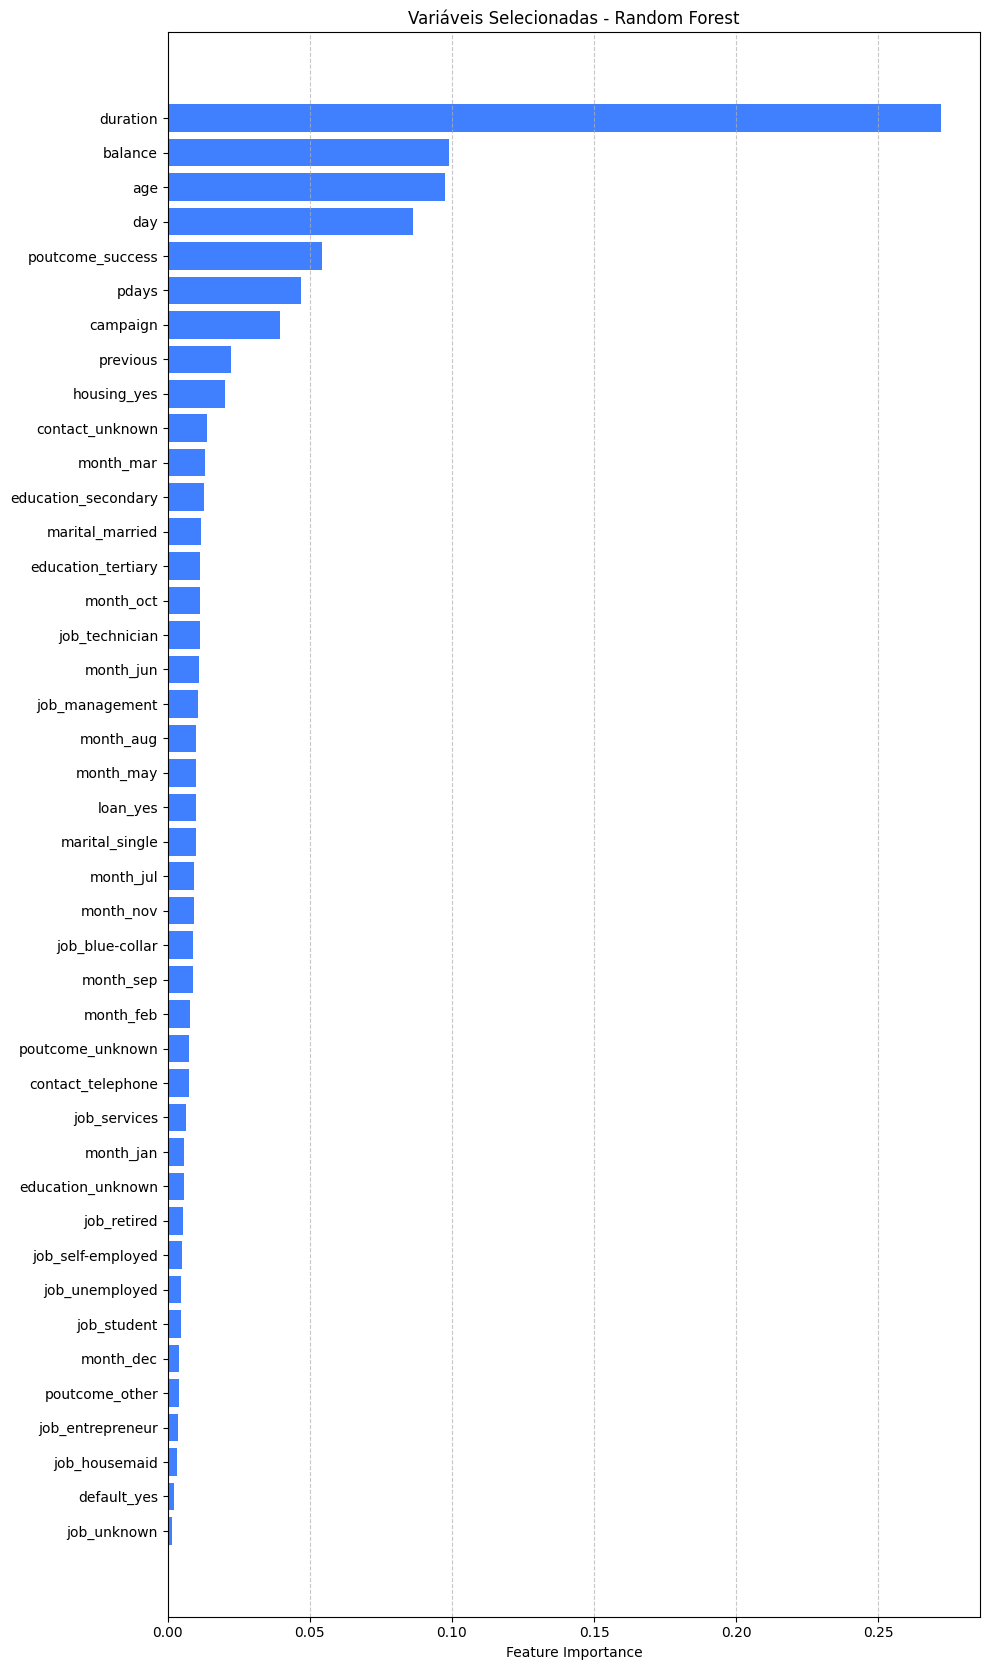

In [13]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.0001

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [14]:
# Salvar a lista em um arquivo .pkl
import pickle
with open('prd_list_features_hktn.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [15]:
# Carregar a lista do arquivo .pkl
with open('prd_list_features_hktn.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'contact_telephone', 'contact_unknown', 'loan_yes', 'housing_yes', 'default_yes', 'education_secondary', 'education_tertiary', 'education_unknown', 'marital_married', 'marital_single']


In [16]:
lista_features = loaded_lista + ['target']
abt_01 = abt_00[lista_features]

abt_01.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,contact_unknown,loan_yes,housing_yes,default_yes,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,target
0,-0.464799,-0.456680,0.140619,-0.404011,0.389277,-1.138504e-15,-0.240512,-0.526225,-0.184151,-0.168627,...,1.578328,-0.437178,-1.119132,-0.140544,-1.033257,1.564172,-0.208793,-1.233806,1.593468,0
1,1.416343,-0.390831,0.380915,0.210292,0.072215,-1.138504e-15,-0.240512,-0.526225,5.430326,-0.168627,...,-0.633582,-0.437178,-1.119132,-0.140544,0.967813,-0.639316,-0.208793,0.810500,-0.627562,0
2,0.475772,-0.456680,-1.301157,-0.674459,-0.244847,-1.138504e-15,-0.240512,1.900329,-0.184151,-0.168627,...,1.578328,-0.437178,0.893550,-0.140544,0.967813,-0.639316,-0.208793,0.810500,-0.627562,0
3,0.005486,0.694328,-1.781749,0.171657,-0.561910,-2.127233e+00,1.812098,-0.526225,-0.184151,-0.168627,...,-0.633582,-0.437178,-1.119132,-0.140544,-1.033257,1.564172,-0.208793,-1.233806,-0.627562,0
4,-0.276685,-0.456680,0.501063,-0.647414,-0.561910,-1.138504e-15,-0.240512,1.900329,-0.184151,-0.168627,...,1.578328,-0.437178,0.893550,-0.140544,0.967813,-0.639316,-0.208793,0.810500,-0.627562,0


In [17]:
abt_test = pd.read_csv('abt_test.csv')
abt_test.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_test.shape

(13564, 43)

In [18]:
lista_features = loaded_lista + ['target']
abt_01_test = abt_test[lista_features]

abt_01_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,contact_unknown,loan_yes,housing_yes,default_yes,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,target
0,-0.087221,-0.248404,0.029771,-0.265462,-0.588636,0.008043,-0.289532,1.930746,-0.185029,-0.166294,...,1.558712,-0.435928,0.894768,-0.122953,0.988419,-0.660382,-0.202638,0.819560,-0.629323,0
1,0.573919,0.709957,-0.811520,-0.693838,-0.251164,0.008043,-0.289532,-0.517935,-0.185029,-0.166294,...,1.558712,-0.435928,-1.117608,-0.122953,0.988419,-0.660382,-0.202638,-1.220167,1.589009,0
2,-1.503949,-0.261541,0.510510,-0.131840,-0.588636,0.008043,-0.289532,-0.517935,-0.185029,-0.166294,...,-0.641555,-0.435928,0.894768,-0.122953,-1.011717,1.514276,-0.202638,-1.220167,1.589009,0
3,0.101676,0.124744,-0.811520,0.202214,-0.588636,2.327377,0.220761,-0.517935,-0.185029,-0.166294,...,-0.641555,-0.435928,-1.117608,-0.122953,-1.011717,1.514276,-0.202638,0.819560,-0.629323,0
4,1.423956,-0.361943,0.630694,-0.544496,-0.251164,0.008043,-0.289532,-0.517935,-0.185029,-0.166294,...,-0.641555,2.293956,-1.117608,-0.122953,-1.011717,1.514276,-0.202638,0.819560,-0.629323,0


In [19]:
# Salvando abt para treinamento dos modelos

abt_01.to_csv('abt_fs01_train.csv')
abt_01_test.to_csv('abt_fs01_test.csv')